## Loading the libraries

In [3]:
import numpy as np
import pandas as pd
import cv2
import h5py
from tqdm.notebook import trange, tqdm

import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import discriminant_analysis
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

## Load up the data from h5 files

In [5]:
###################################################
# Run this only if you have the h5 files
# and don't want to process all the images again.
# Otherwise run the two cells below.
# The bottom two cells will generate HDF5 (.h5)
# format files which is compressed form of data
###################################################

with h5py.File('data_train.h5', 'r') as hf:
    train_imgs = np.array(hf['imgs'])
    train_labels = np.array(hf['labels'])


with h5py.File('data_test.h5', 'r') as hf:
    test_imgs = np.array(hf['imgs'])
    test_labels = np.array(hf['labels'])

In [20]:
test_labels

array(['normal', 'normal', 'normal', ..., 'pneumonia', 'pneumonia',
       'pneumonia'], dtype=object)

### Training dataset shape

In [6]:
train_imgs.shape

(13942, 128, 128)

In [23]:
test_imgs.shape

(1579, 128, 128)

### Training class distribution

From the bar plot, we can clearly see that there is a clear class imbalance in the training dataset. There is a very large number of occurances of **'Normal'** and **Pneumonia'** class compared to **'COVID-19'** class. This imbalance would likely affect any model that is built and trained on this dataset in a way that 

<BarContainer object of 3 artists>

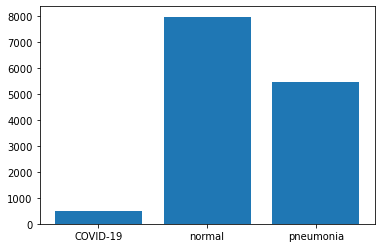

In [21]:
plt.bar(np.unique(train_labels, return_counts=True)[0], np.unique(train_labels, return_counts=True)[1])

<BarContainer object of 3 artists>

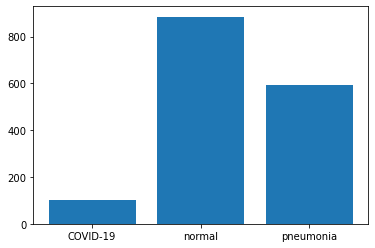

In [22]:
plt.bar(np.unique(test_labels, return_counts=True)[0], np.unique(test_labels, return_counts=True)[1])